In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import glob
import os

In [2]:
# Use root for analysis, instead of notebooks folder. 
# WARNING: Only run this once!
print("Current WD:", os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Analysis WD:", os.getcwd())

Current WD: c:\Users\jeffc\source\repos\analysis-datascience-jobs\notebooks
Analysis WD: c:\Users\jeffc\source\repos\analysis-datascience-jobs


# Data Scientist Jobs
Exploratory Data Analysis (EDA) for data scientist jobs. 

In [103]:
df = pd.read_csv("data/processed/data-science-jobs.csv")
cities = pd.read_csv('data/raw/cities.csv')

In [104]:
cityjobs = df.merge(cities, left_on="MetroID", right_on="ID")
print("MISSING AVGWAGE: ", cityjobs[cityjobs["wageavg"].isna()].shape[0])
print("NOT MISSING AVGWAGE: ", cityjobs[cityjobs["wageavg"].notna()].shape[0])
cityjobs = cityjobs[cityjobs["wageavg"].notna()]

MISSING AVGWAGE:  1556
NOT MISSING AVGWAGE:  3649


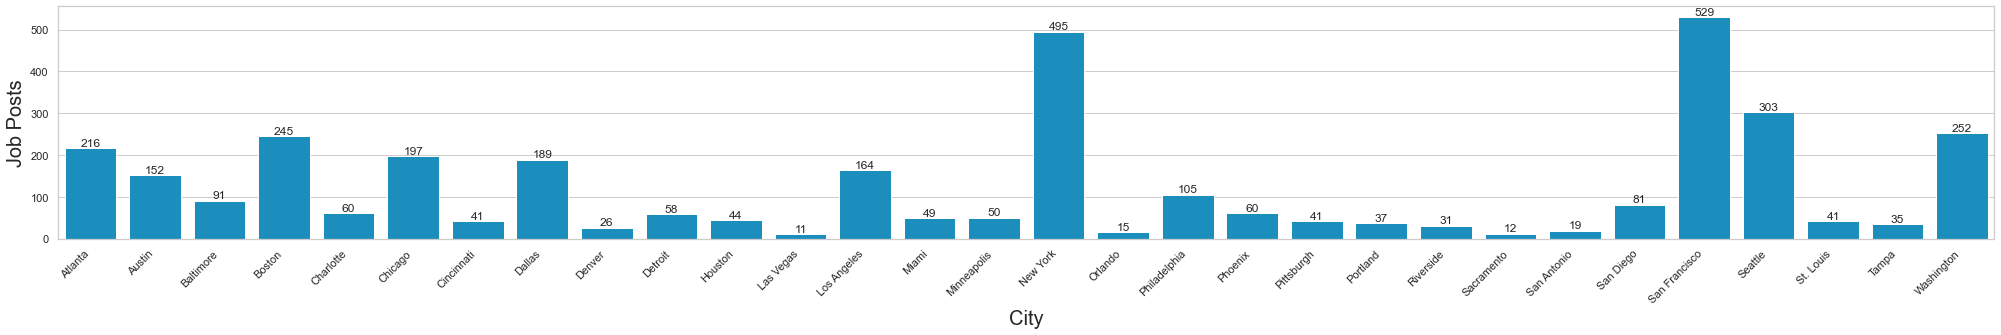

In [91]:
cityposts = cityjobs.copy()[["City"]]
cityposts = cityposts.groupby(by=["City"]).size().to_frame('size')
cityposts.reset_index(level=["City"], inplace=True)

sns.set(rc={'figure.figsize':(34.7,4.27)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="City", y="size", data=cityposts, color='#0099d8')
ax.set_ylabel("Job Posts Per 100k People", fontsize = 20)
ax.set_xlabel("City", fontsize = 20)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('reports/figures/allcities-jobsposted.png', bbox_inches="tight")

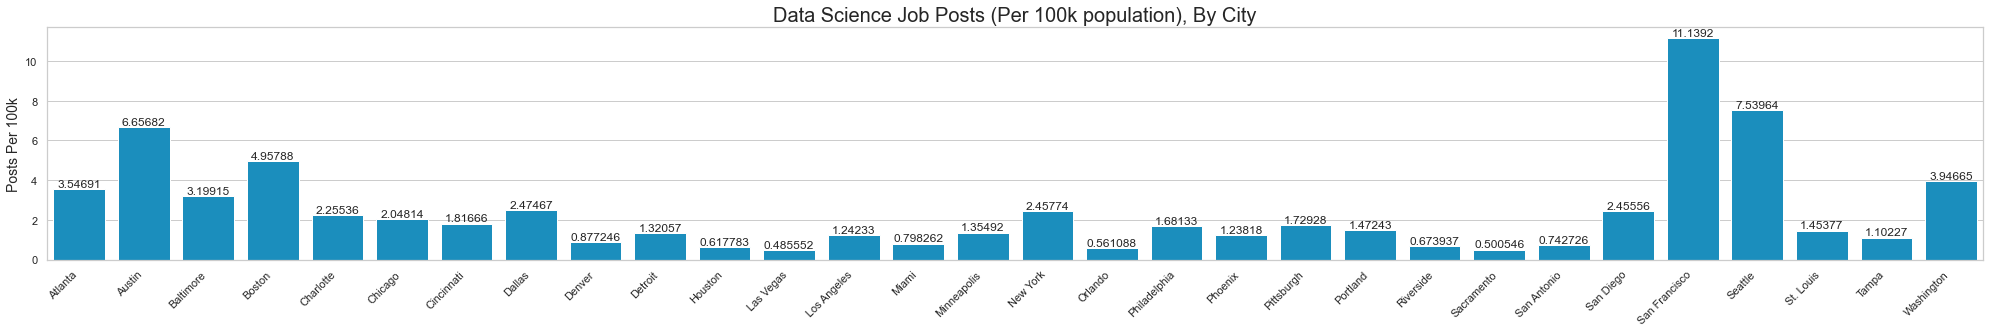

In [100]:
# Jobs per 100k people

citypostsperpop = cityjobs.copy()[["City", "2020 Census"]]
citypostsperpop["2020 Census"] = pd.to_numeric(citypostsperpop.apply(lambda x: x["2020 Census"].replace(",",""), axis=1))
citypostsperpop["Pop_100k"] = citypostsperpop.apply(lambda x: x["2020 Census"]/100000, axis=1)
citypostsperpop = citypostsperpop.groupby(by=["City", "2020 Census", "Pop_100k"]).size().to_frame('size')
citypostsperpop.reset_index(level=["City", "2020 Census", "Pop_100k"], inplace=True)
citypostsperpop["Jobs_Per100k"] = citypostsperpop["size"]/citypostsperpop["Pop_100k"]
citypostsperpop

sns.set(rc={'figure.figsize':(34.7,4.27)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="City", y="Jobs_Per100k", data=citypostsperpop, color='#0099d8')
ax.set_title("Data Science Job Posts (Per 100k population), By City", fontsize = 20)
ax.set_ylabel("Posts Per 100k", fontsize = 14)
ax.set_xlabel(None)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('reports/figures/allcities-jobsper100k.png', bbox_inches="tight")

### Average Data Scientist Base Salary by City

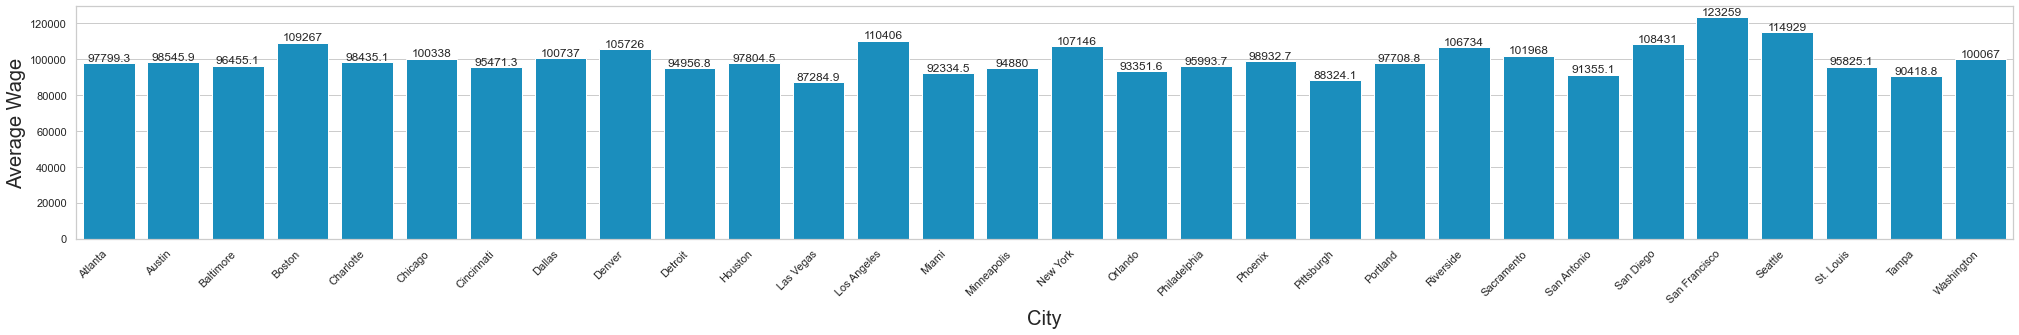

In [120]:
cityavgwages = cityjobs.copy()[["City", "wageavg"]]
cityavgwages["wageavg"] = pd.to_numeric(cityavgwages["wageavg"])
cityavgwages = cityavgwages.groupby(by=["City"]).mean()
cityavgwages.reset_index(level=["City"], inplace=True)

sns.set(rc={'figure.figsize':(34.7,4.27)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="City", y="wageavg", data=cityavgwages, color='#0099d8')
ax.set_ylabel("Average Wage", fontsize = 20)
ax.set_xlabel("City", fontsize = 20)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('reports/figures/allcities-avgwage.png', bbox_inches="tight")

### Job Avg Wage Compared to Cost of Living

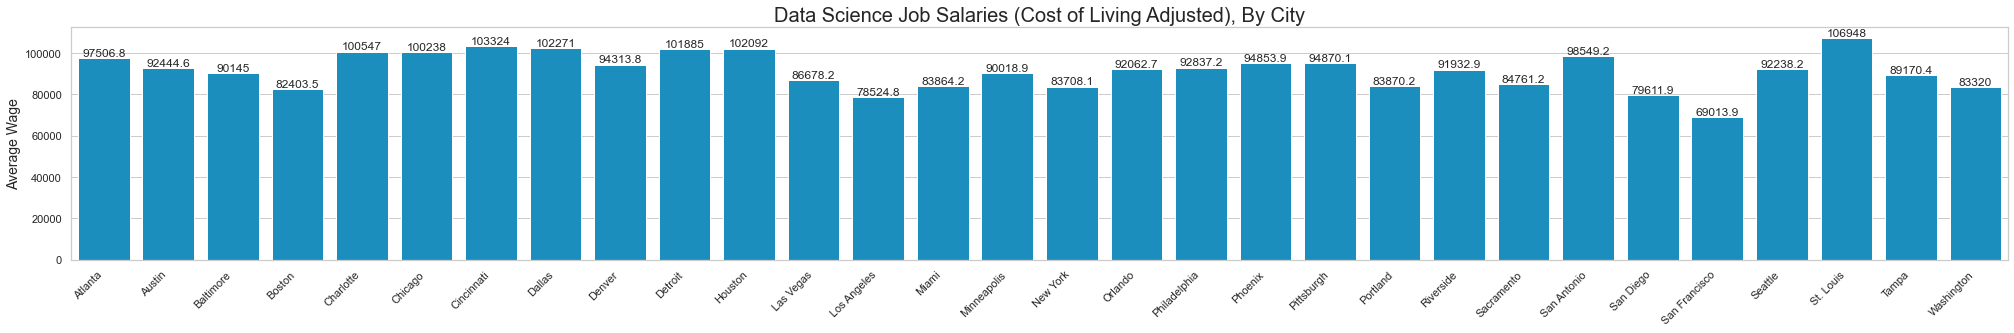

In [119]:
citywagecostofliving = cityjobs.copy()[["City", "wageavg", "Cost of Living Index"]]
citywagecostofliving["wageavg"] = pd.to_numeric(citywagecostofliving["wageavg"])
citywagecostofliving = citywagecostofliving.groupby(by=["City", "Cost of Living Index"]).mean()
citywagecostofliving.reset_index(level=["City", "Cost of Living Index"], inplace=True)
citywagecostofliving["COL_Normalized"] = MinMaxScaler().fit_transform(np.array(citywagecostofliving["Cost of Living Index"]).reshape(-1,1))
citywagecostofliving["WagePerCOL"] = (citywagecostofliving["wageavg"]/citywagecostofliving["Cost of Living Index"])*100
#citywagecostofliving = citywagecostofliving.sort_values(by="wageavg", ascending=False).head(30)
citywagecostofliving

sns.set(rc={'figure.figsize':(34.7,4.27)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="City", y="WagePerCOL", data=citywagecostofliving, color='#0099d8')
ax.set_title("Data Science Job Salaries (Cost of Living Adjusted), By City", fontsize = 20)
ax.set_ylabel("Average Wage", fontsize = 14)
ax.set_xlabel(None)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('reports/figures/allcities-avgwage-costofliving.png', bbox_inches="tight")


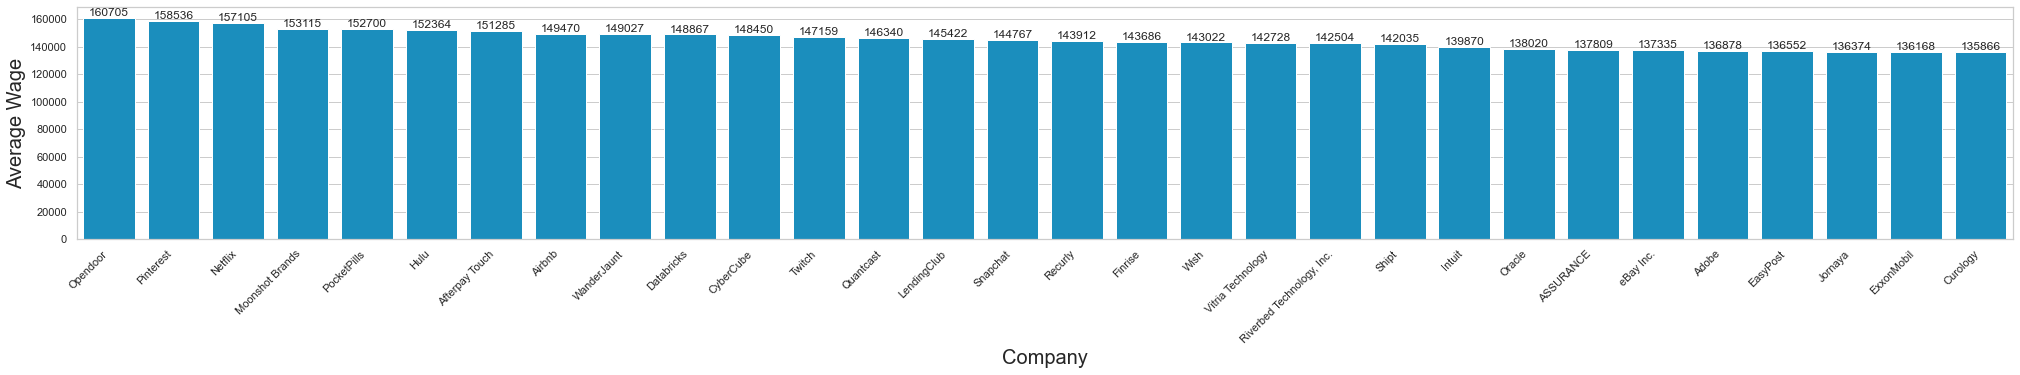

In [117]:
companyavg = cityjobs.copy()[["companyname", "wageavg"]]
companyavg["wageavg"] = pd.to_numeric(companyavg["wageavg"])
companyavg = companyavg.groupby(by=["companyname"]).mean()
companyavg.reset_index(level=["companyname"], inplace=True)
companyavg = companyavg.sort_values(by="wageavg", ascending=False).head(30)

sns.set(rc={'figure.figsize':(34.7,4.27)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="companyname", y="wageavg", data=companyavg, color='#0099d8')
ax.set_ylabel("Average Wage", fontsize = 20)
ax.set_xlabel("Company", fontsize = 20)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('reports/figures/topcompanies-allcities-avgwage.png', bbox_inches="tight")

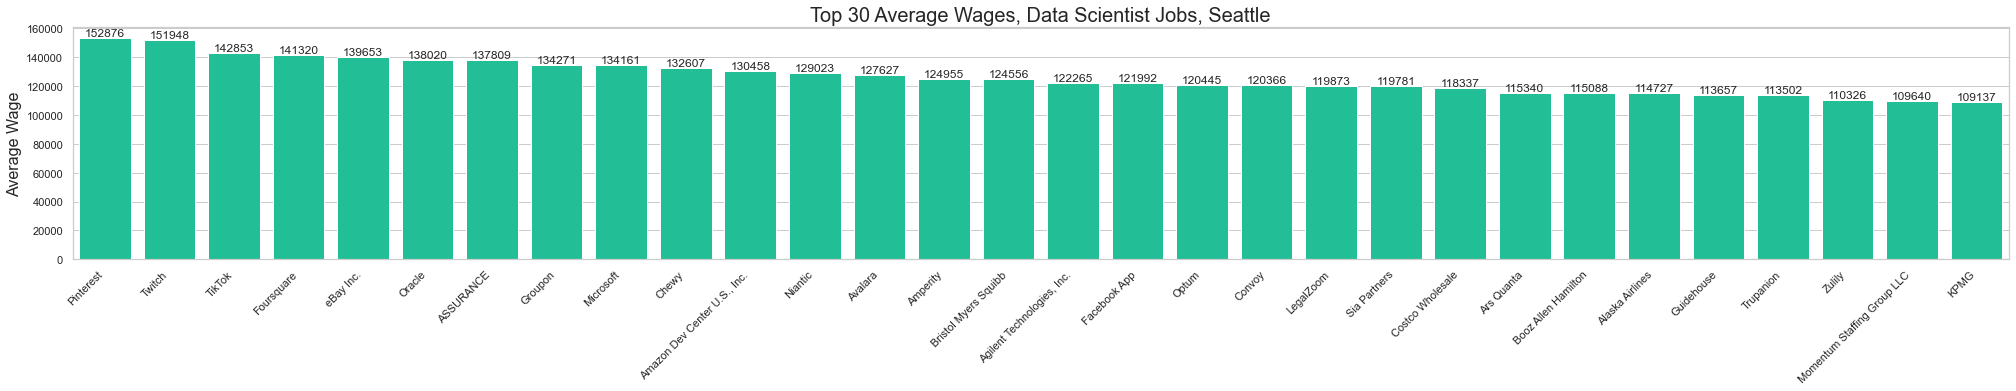

In [70]:
seacompanyavg = cityjobs[cityjobs["City"]=="Seattle"].copy()[["companyname", "wageavg"]]
seacompanyavg["wageavg"] = pd.to_numeric(seacompanyavg["wageavg"])
seacompanyavg = seacompanyavg.groupby(by=["companyname"]).mean()
seacompanyavg.reset_index(level=["companyname"], inplace=True)
seacompanyavg = seacompanyavg.sort_values(by="wageavg", ascending=False).head(30)
targetcompanies = seacompanyavg["companyname"].tolist()

sns.set(rc={'figure.figsize':(34.7,4.27)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="companyname", y="wageavg", data=seacompanyavg, color="#08d9a3")
ax.set_title('Top 30 Average Wages, Data Scientist Jobs, Seattle', fontsize=20)
ax.set_ylabel("Average Wage", fontsize = 16)
ax.set(xlabel=None)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('reports/figures/topcompanies-seattle-avgwage.png', bbox_inches="tight")

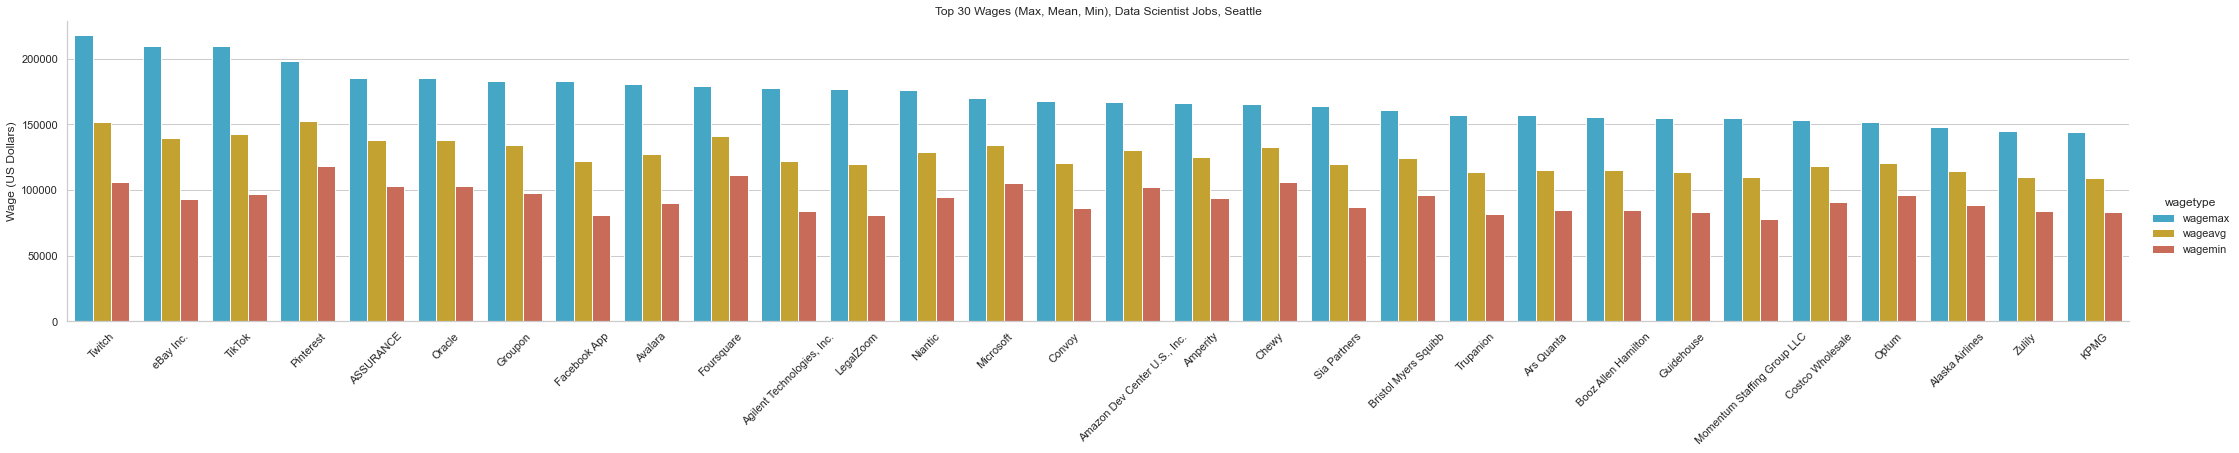

In [75]:
seacompanyavg = cityjobs[cityjobs["City"]=="Seattle"].copy()[["companyname", "wageavg", "wagemin", "wagemax"]]
seacompanyavg["wageavg"] = pd.to_numeric(seacompanyavg["wageavg"])
seacompanyavg["wagemin"] = pd.to_numeric(seacompanyavg["wagemin"])
seacompanyavg["wagemax"] = pd.to_numeric(seacompanyavg["wagemax"])
seacompanyavg = seacompanyavg.dropna()
seacompanyavg = seacompanyavg.groupby(['companyname'])["wageavg", "wagemin", "wagemax"].apply(lambda x : x.astype(int).mean())
seacompanyavg.reset_index(level=["companyname"], inplace=True)
seacompanyavg = pd.melt(seacompanyavg, id_vars="companyname", var_name="wagetype", value_name="wageval")

seacompanyavg = seacompanyavg[seacompanyavg["companyname"].isin(targetcompanies)]
seacompanyavg.sort_values(by="wageval", ascending=False, inplace=True)

#seacompanyavg = seacompanyavg.sort_values(by="wageavg", ascending=False).head(30)

sns.set(rc={'figure.figsize':(34.7,4.27)})
sns.set_theme(style="whitegrid")
colorz = ["#31B1DB", "#DBAF1A", "#DB5E46"]
ax = sns.factorplot(x="companyname", y="wageval", data=seacompanyavg, hue='wagetype', kind="bar", aspect=6, palette= colorz)
ax.set(title='Top 30 Wages (Max, Mean, Min), Data Scientist Jobs, Seattle')
ax.set(xlabel=None)
ax.set(ylabel="Wage (US Dollars)")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xticks(rotation=45)
plt.savefig('reports/figures/topcompanies-seattle-threewages.png', bbox_inches="tight")

In [ ]:
seacompanyavg = cityjobs[cityjobs["City"]=="Seattle"].copy()[["companyname", "wageavg", "wagemin", "wagemax"]]
seacompanyavg["wageavg"] = pd.to_numeric(seacompanyavg["wageavg"])
seacompanyavg["wagemin"] = pd.to_numeric(seacompanyavg["wagemin"])
seacompanyavg["wagemax"] = pd.to_numeric(seacompanyavg["wagemax"])
seacompanyavg = seacompanyavg.dropna()
seacompanyavg = seacompanyavg.groupby(['companyname'])["wageavg", "wagemin", "wagemax"].apply(lambda x : x.astype(int).mean())
seacompanyavg.reset_index(level=["companyname"], inplace=True)
seacompanyavg = pd.melt(seacompanyavg, id_vars="companyname", var_name="wagetype", value_name="wageval")

seacompanyavg = seacompanyavg[seacompanyavg["companyname"].isin(targetcompanies)]
seacompanyavg.sort_values(by="wageval", ascending=False, inplace=True)

#seacompanyavg = seacompanyavg.sort_values(by="wageavg", ascending=False).head(30)

sns.set(rc={'figure.figsize':(34.7,4.27)})
sns.set_theme(style="whitegrid")
colorz = ["#31B1DB", "#DBAF1A", "#DB5E46"]
ax = sns.factorplot(x="companyname", y="wageval", data=seacompanyavg, hue='wagetype', kind="bar", aspect=6, palette= colorz)
ax.set(title='Top 30 Wages (Max, Mean, Min), Data Scientist Jobs, Seattle')
ax.set(xlabel=None)
ax.set(ylabel="Wage (US Dollars)")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xticks(rotation=45)
plt.savefig('reports/figures/topcompanies-seattle-threewages.png', bbox_inches="tight")